## Importing

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import dill
import datetime
from tqdm import tqdm


## Datasets Preparation

In [ ]:
def datasets_preparation():

    ds_name = ('/results2/SalishSea/nowcast-green.202111/' + i + '/SalishSea_1d_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]])+str(i[0:2]) + '_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]]) + str(i[0:2]) + '_grid_T.nc')

    ds_bio_name = ('/results2/SalishSea/nowcast-green.202111/' + i + '/SalishSea_1d_'  + '20' + str(i[5:7]) + str(dict_month[i[2:5]])+str(i[0:2]) + '_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]]) + str(i[0:2]) + '_biol_T.nc')

    ds_prod_name = ('/results2/SalishSea/nowcast-green.202111/' + i + '/SalishSea_1d_'  + '20' + str(i[5:7]) + str(dict_month[i[2:5]])+str(i[0:2]) + '_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]]) + str(i[0:2]) + '_prod_T.nc')

    ds = xr.open_dataset (ds_name)
    ds_bio = xr.open_dataset (ds_bio_name)
    ds_prod = xr.open_dataset(ds_prod_name)

    date = pd.DatetimeIndex(ds['time_counter'].values)

    temp_i1 = ((ds.votemper.where(mask==1)[0,0:15] * ds.e3t.where(mask==1)
    [0,0:15]).sum('deptht', skipna = True, min_count = 15) / mesh.gdepw_0[0,15]).mean().values

    temp_i2 = ((ds.votemper.where(mask==1)[0,15:27] * ds.e3t.where(mask==1)
    [0,15:27]).sum('deptht', skipna = True, min_count = 12) / (mesh.gdepw_0
    [0,27] - mesh.gdepw_0[0,14])).mean().values

    saline_i1 = ((ds.vosaline.where(mask==1)[0,0:15] * ds.e3t.where(mask==1)
    [0,0:15]).sum('deptht', skipna = True, min_count = 15) / mesh.gdepw_0[0,15]).mean().values

    saline_i2 = ((ds.vosaline.where(mask==1)[0,15:27] * ds.e3t.where(mask==1)
    [0,15:27]).sum('deptht', skipna = True, min_count = 12) / (mesh.gdepw_0
    [0,27] - mesh.gdepw_0[0,14])).mean().values

    sil_i = ((ds_bio.silicon.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    nitr_i = ((ds_bio.nitrate.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    ammo_i = ((ds_bio.ammonium.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    diat_i = ((ds_bio.diatoms.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    flag_i = ((ds_bio.flagellates.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    micro_i = ((ds_bio.microzooplankton.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    meso_i = ((ds_bio.mesozooplankton.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    diat_i_prod = (((ds_prod.PPDIAT.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
        [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]) / ((ds_bio.diatoms.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
        [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27])).mean().values

    return (date, temp_i1, temp_i2, saline_i1, saline_i2, sil_i, nitr_i, ammo_i, diat_i,  flag_i, micro_i, meso_i, diat_i_prod)


## Plotting

In [ ]:
def plotting(variable,year_variable,title,y_label):
    
    fig, ax = plt.subplots()
    scatter= ax.scatter(dates,variable, marker='.', c=pd.DatetimeIndex(dates).month)
    plt.ylabel(y_label)
    ax.legend(handles=scatter.legend_elements()[0], labels=['February','March','April'])
    ax.plot(years2,year_variable,color='red',marker='*')
    fig.suptitle('Daily Mean ' + title + ' (15 Feb - 30 Apr)')
    fig.show()
    

## Main Body

In [ ]:
dict_month = {'jan': '01',
         'feb': '02',
         'mar': '03',
         'apr': '04',
         'may': '05',
         'jun': '06',
         'jul': '07',
         'aug': '08',
         'sep': '09',
         'oct': '10',
         'nov': '11',
         'dec': '12'}

path = os.listdir('/results2/SalishSea/nowcast-green.202111/')

folders = [x for x in path if ((x[2:5]=='mar' or x[2:5]=='apr' or (x[2:5]=='feb' and x[0:2] > '14')))]
indx_dates=(np.argsort(pd.to_datetime(folders, format="%d%b%y")))
folders = [folders[i] for i in indx_dates]

# Open the mesh mask
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()

dates = np.array([])

temp_i1_mean = np.array([])
temp_i2_mean = np.array([])
saline_i1_mean = np.array([])
saline_i2_mean = np.array([])

sil_i_mean = np.array([])
nitr_i_mean = np.array([])
ammo_i_mean = np.array([])

diat_i_mean = np.array([])
flag_i_mean = np.array([])

micro_i_mean = np.array([])
meso_i_mean = np.array([])

diat_i_prod_mean = np.array([])

for i in tqdm(folders):

    date, temp_i1, temp_i2, saline_i1, saline_i2, sil_i, nitr_i, ammo_i, diat_i, flag_i, micro_i, meso_i, diat_i_prod = datasets_preparation()

    dates = np.append(dates,date.date)

    temp_i1_mean = np.append(temp_i1_mean,temp_i1)
    temp_i2_mean = np.append(temp_i2_mean,temp_i2)
    saline_i1_mean = np.append(saline_i1_mean,saline_i1)
    saline_i2_mean = np.append(saline_i2_mean,saline_i2)

    sil_i_mean = np.append(sil_i_mean,sil_i)
    nitr_i_mean = np.append(nitr_i_mean,nitr_i)
    ammo_i_mean = np.append(ammo_i_mean,ammo_i)

    diat_i_mean = np.append(diat_i_mean,diat_i)
    flag_i_mean = np.append(flag_i_mean,flag_i)

    micro_i_mean = np.append(micro_i_mean,micro_i)
    meso_i_mean = np.append(meso_i_mean,meso_i)

    diat_i_prod_mean = np.append(diat_i_prod_mean, diat_i_prod)

# Calculating the monthly means

years2 = []

temp_i1_year = []
temp_i2_year = []
saline_i1_year = []
saline_i2_year = []

sil_i_year = []
nitr_i_year = []
ammo_i_year = []

diat_i_year = []
flag_i_year = []

micro_i_year = []
meso_i_year = []

diat_i_prod_year = []

years = range (2007,2024)

for i in tqdm(years):
    
    years2.append(datetime.datetime(i,4,15))

    temp_i1_year.append(temp_i1_mean[pd.DatetimeIndex(dates).year==i].mean())
    temp_i2_year.append(temp_i2_mean[pd.DatetimeIndex(dates).year==i].mean())
    saline_i1_year.append(saline_i1_mean[pd.DatetimeIndex(dates).year==i].mean())
    saline_i2_year.append(saline_i2_mean[pd.DatetimeIndex(dates).year==i].mean())

    sil_i_year.append(sil_i_mean[pd.DatetimeIndex(dates).year==i].mean())
    nitr_i_year.append(nitr_i_mean[pd.DatetimeIndex(dates).year==i].mean())
    ammo_i_year.append(ammo_i_mean[pd.DatetimeIndex(dates).year==i].mean())
    
    diat_i_year.append(diat_i_mean[pd.DatetimeIndex(dates).year==i].mean())
    flag_i_year.append(flag_i_mean[pd.DatetimeIndex(dates).year==i].mean())

    micro_i_year.append(micro_i_mean[pd.DatetimeIndex(dates).year==i].mean())
    meso_i_year.append(meso_i_mean[pd.DatetimeIndex(dates).year==i].mean())

    diat_i_prod_year.append(diat_i_prod_mean[pd.DatetimeIndex(dates).year==i].mean())

# Plotting

plotting(temp_i1_mean, temp_i1_year, 'Conservative Temperature (0-15m)',
'Conservative Temperature [degree_C m-1]')
plotting(temp_i2_mean, temp_i2_year, 'Conservative Temperature (15-100m)', 
'Conservative Temperature [degree_C m-1]')
plotting(saline_i1_mean, saline_i1_year, 'Reference Salinity (0-15m)', 
'Reference Salinity [g kg-1 m-1]')
plotting(saline_i2_mean, saline_i2_year, 'Reference Salinity (15-100m)', 
'Reference Salinity [g kg-1 m-1]')

plotting(sil_i_mean, sil_i_year, 'Silicon Concentration', 
'Silicon Concentration [mmol m-2]')
plotting(nitr_i_mean, nitr_i_year, 'Nitrate Concentration', 
'Nitrate Concentration [mmol m-2]')
plotting(ammo_i_mean, ammo_i_year, 'Ammonium Concentration', 
'Ammonium Concentration [mmol m-2]')

plotting(diat_i_mean, diat_i_year, 'Diatom Concentration', 
'Diatom Concentration [mmol m-2]')
plotting(flag_i_mean, flag_i_year, 'Flagellate Concentration', 
'Flagellate Concentration [mmol m-2]')

plotting(micro_i_mean, micro_i_year, 'Microzooplankton Concentration', 
'Microzooplankton Concentration [mmol m-2]')
plotting(meso_i_mean, meso_i_year, 'Mesozooplankton Concentration', 
'Mesozooplankton Concentration [mmol m-2]')

plotting(diat_i_prod_mean, diat_i_prod_year, 'Primary Production of Diatoms', 
'Diatom Production Rate [mmol N m-2 s-1]')



100%|██████████| 17/17 [00:00<00:00, 292.00it/s]


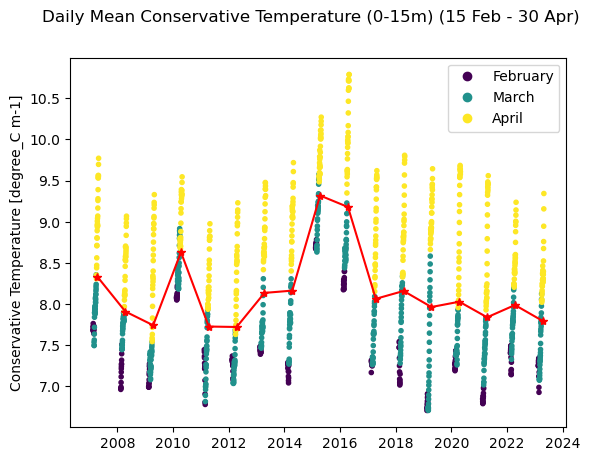

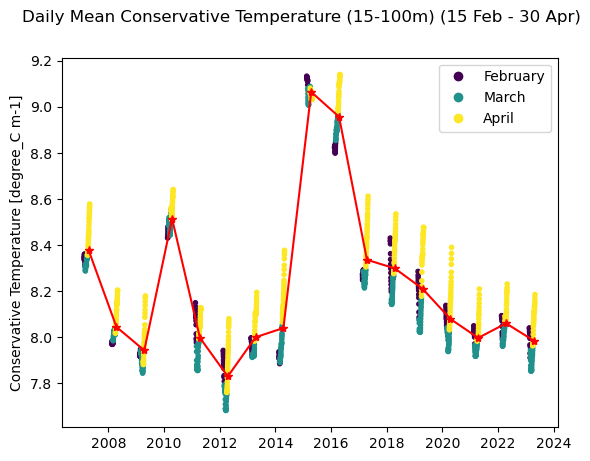

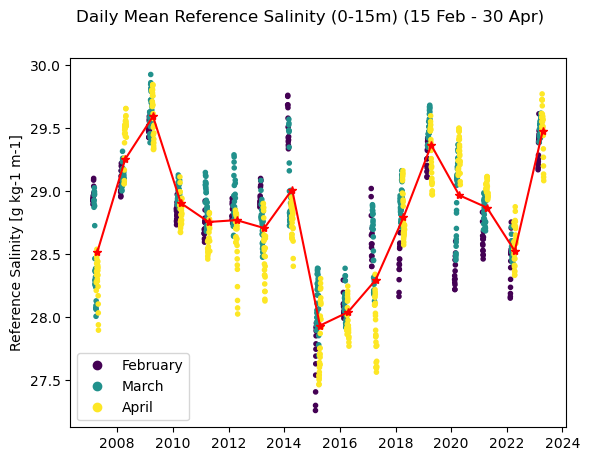

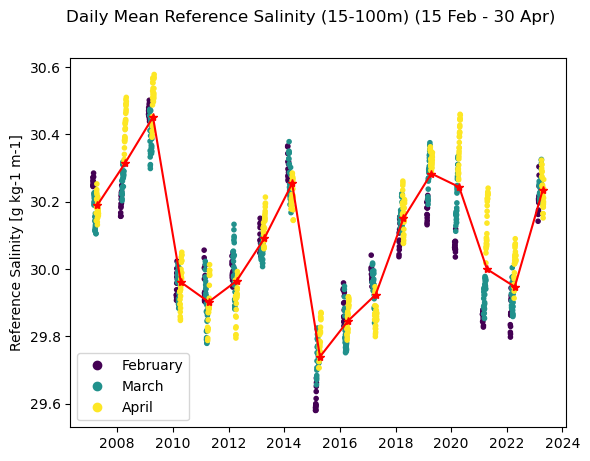

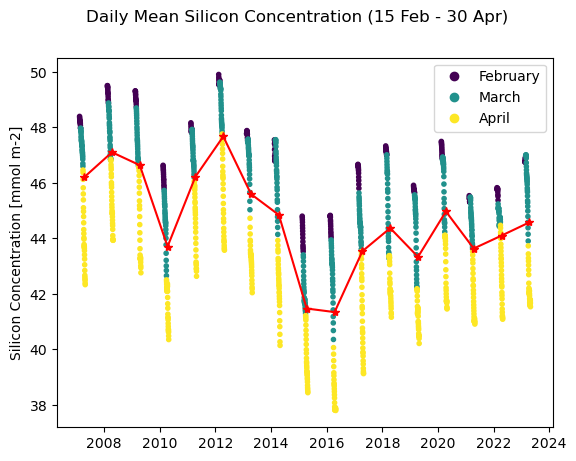

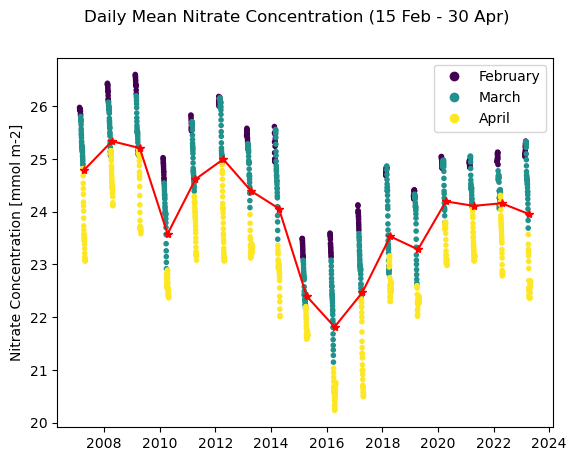

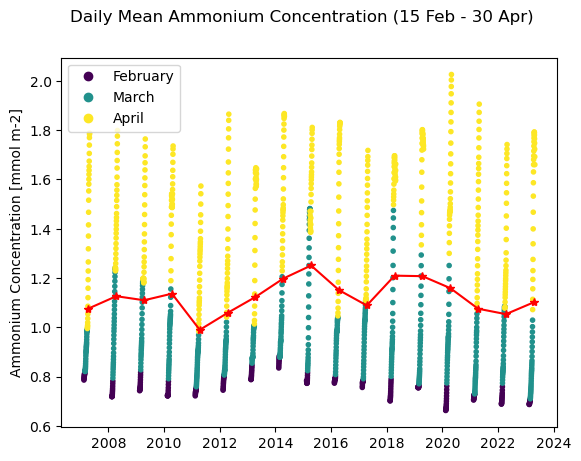

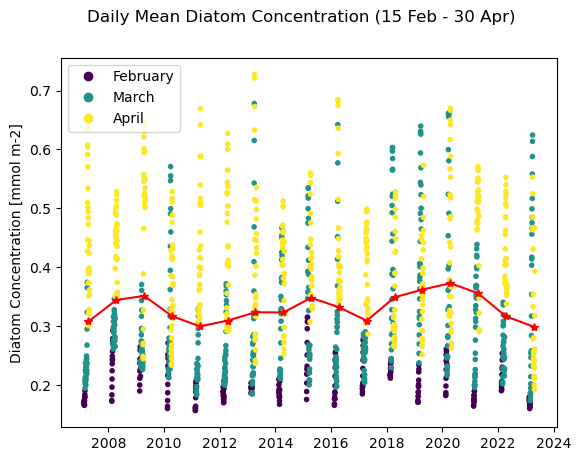

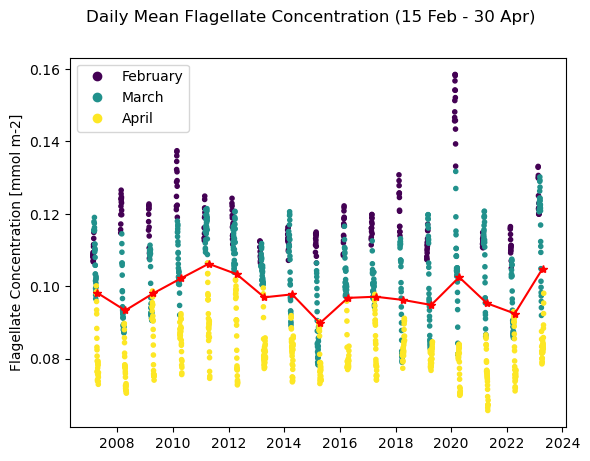

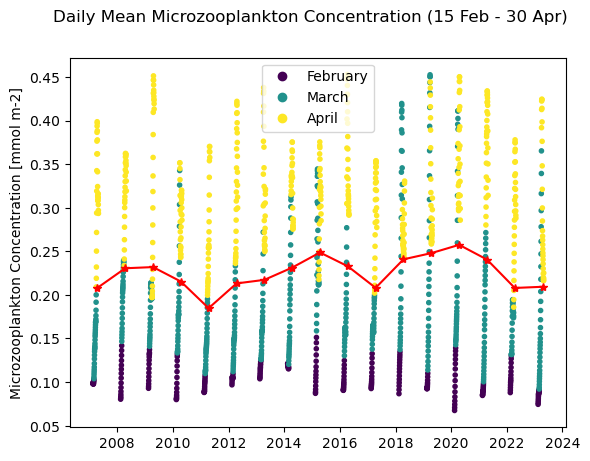

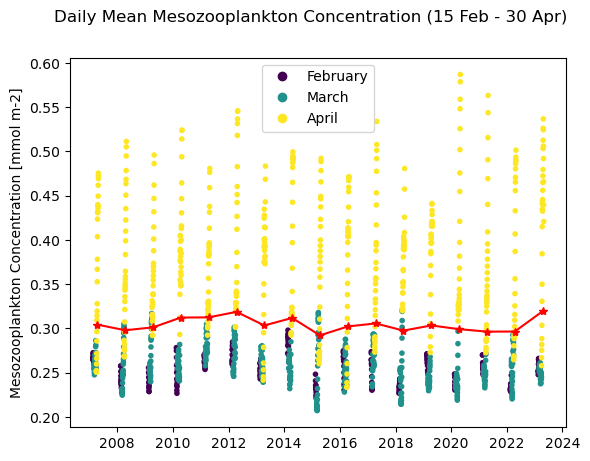

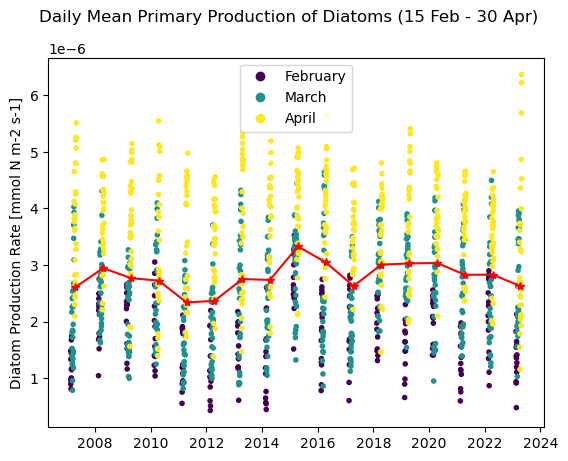